In [1]:
import json
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Collect statistics

In [2]:
load_dirs = [
    '../results/ballcascade_8_0.25_stats.json',
    '../results/pretrained_yolov5s_stats.json',
    '../results/nanodet-plus-m_416_stats.json',
    '../results/finedet_map93_416_stats.json',
    '../results/yolox_nano_stats.json',
]
models_dict = {}
for dir in load_dirs:
    with open(dir, 'r') as input_file:
        read_dict = json.load(input_file)
    models_dict[list(read_dict.keys())[0]] = read_dict.values()
    

Plot results

In [3]:
model_keys = list(models_dict.keys())
model_results = [list(models_dict[model])[0] for model in model_keys]
dataset_keys = list(model_results[0].keys())
measures_keys = list(model_results[0][dataset_keys[0]].keys())
measures_values = [[list(model_results[model_no][dset].values()) for dset in dataset_keys] for model_no in range(len(model_keys))]

In [4]:
def my_barplot(ax, num):
    x = np.arange(len(measures))
    num_models = len(model_keys)
    width = 1/(num_models+1)
    ax[num].set_xticks(x)
    ax[num].set_xticklabels(measures)
    shift = (np.arange(num_models)-(num_models-1)/2)*width
    for model_no, model in enumerate(model_keys):
        ax[num].bar(x+shift[model_no], measures_values[model_no][num], width = width, label = model)

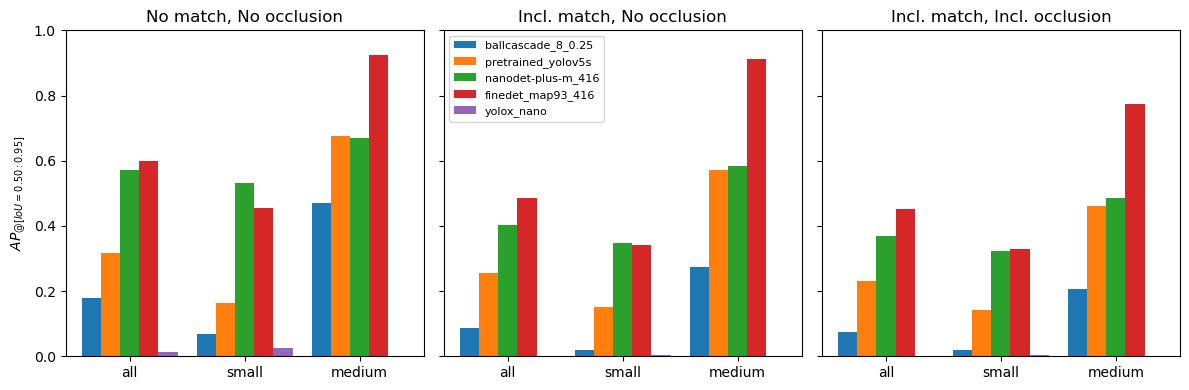

In [5]:
measures = [key[measures_keys[0].rfind('-')+1:-1] for key in measures_keys]

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)
ax=axes.ravel()

ax[0].set_title("No match, No occlusion")
my_barplot(ax,0)
ax[0].set_ylabel('$'+ measures_keys[0][:measures_keys[0].find('-')]+'}$')
ax[0].set_ylim([0,1])

ax[1].set_title("Incl. match, No occlusion")
my_barplot(ax,1)
ax[1].legend(loc="upper left", fontsize="8", ncol=1)

ax[2].set_title("Incl. match, Incl. occlusion")
my_barplot(ax,2)

fig.tight_layout()
plt.show()